In [1]:
%matplotlib notebook
import sys
import os.path as osp
sys.path.append(osp.dirname(osp.dirname(osp.abspath('__file__'))))
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pickle
from cycler import cycler
from config import SAVE_DIR
from acoc import acoc_plotter as plotter
import seaborn as sns

/Users/torrytufteland/miniconda2/envs/acoc/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Multi-level vs. gran.tuning

<IPython.core.display.Javascript object>


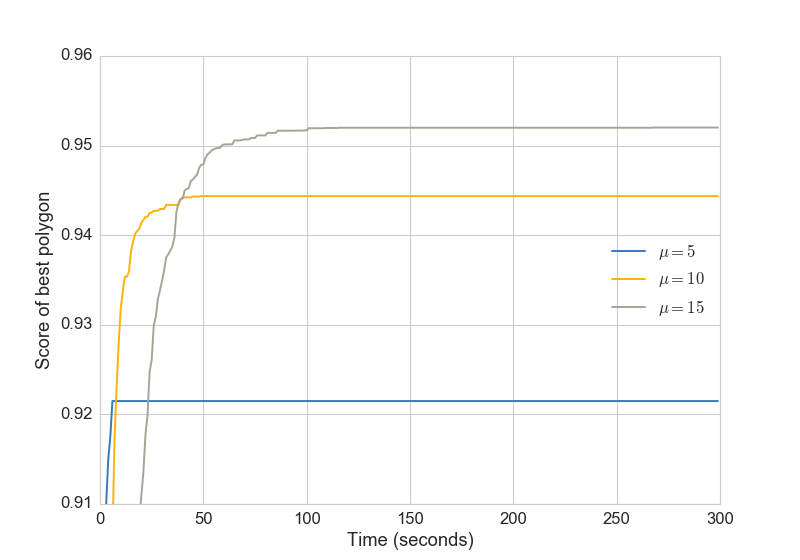

In [2]:
data = pickle.load(open(osp.join(SAVE_DIR, '02.19, multileveling server/results.pickle'), 'rb'))
data = np.array(data)
# data = data[1:7]
data = np.take(data, [2,3,4], axis=0)

data = data.T[0:300].T
x = range(data.shape[1])


sns.set(rc={"figure.figsize": (10, 7),"lines.linewidth": 3}, font_scale=1.5)
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
#sns.palplot(sns.xkcd_palette(colors))
sns.set_palette(sns.xkcd_palette(colors))
sns.set_style("whitegrid")

labels = [
#           'With multi-leveling', 
          r'$\mu = 5$', 
          r'$\mu = 10$', 
          r'$\mu = 15$',
          r'$\mu = 30$',
          r'$\mu = 60$'
         ]
fig, ax = plt.subplots()

ax.set_xlabel('Time (seconds)',size=20)
ax.set_ylabel('Score of best polygon',size=20)
ax.set_ylim([0.91,0.96])

for i in range(data.shape[0]):
    plt.plot(x, data[i], label=labels[i])
lgd = plt.legend(labels, loc='center right')

#fig.savefig(granularity_tuning_bw.eps', bbox_extra_artists=(legend,), bbox_inches='tight')

<IPython.core.display.Javascript object>


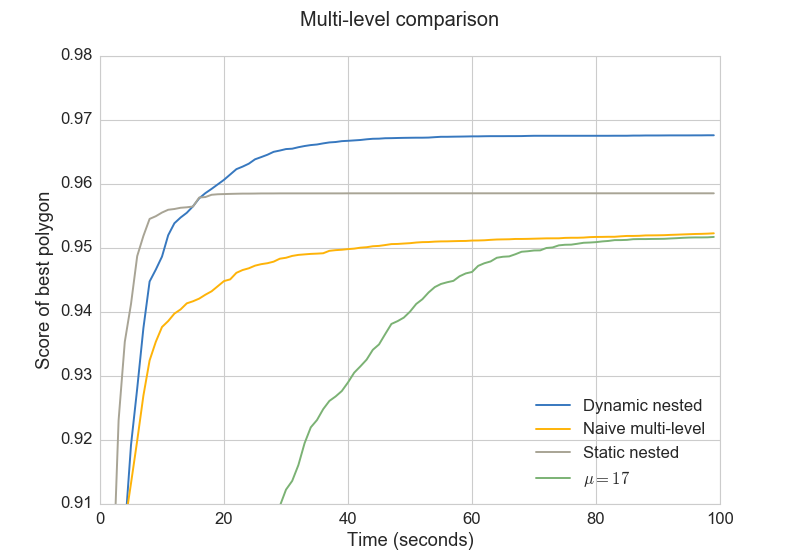

In [103]:
nested_static = pickle.load(open(osp.join(SAVE_DIR, '02.24, multilevel med nest grid/results.pickle'), 'rb'))
data = pickle.load(open(osp.join(SAVE_DIR, '02.24, multilevel med nest grid/run2/results.pickle'), 'rb'))

data = np.concatenate((np.array(data), np.array(nested_static)[1:3]))
x = range(data.shape[1])

sns.set(rc={"figure.figsize": (10, 7),"lines.linewidth": 3}, font_scale=1.5)
sns.set_style("whitegrid")
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
#sns.palplot(sns.xkcd_palette(colors))
#sns.set(rc={"figure.figsize": (7, 5)})
sns.set_palette(sns.xkcd_palette(colors))

labels = [
          'Dynamic nested',
          'Naive multi-level',
          'Static nested',
          r'$\mu = 17$'
         ]
fig, ax = plt.subplots()

fig.suptitle("Multi-level comparison", size=25)
ax.set_xlabel('Time (seconds)',size=20)
ax.set_ylabel('Score of best polygon',size=20)

ax.set_ylim([0.91,0.98])

for i in range(data.shape[0]):
    plt.plot(x, data[i], label=labels[i])
    
lgd = plt.legend(labels, loc='lower right')

#fig.savefig('D:\\Dropbox\\ACOC\Master\\rapport_bilder\\newImages\\diff_multi-level.pdf', bbox_extra_artists=(legend,), bbox_inches='tight')

<IPython.core.display.Javascript object>


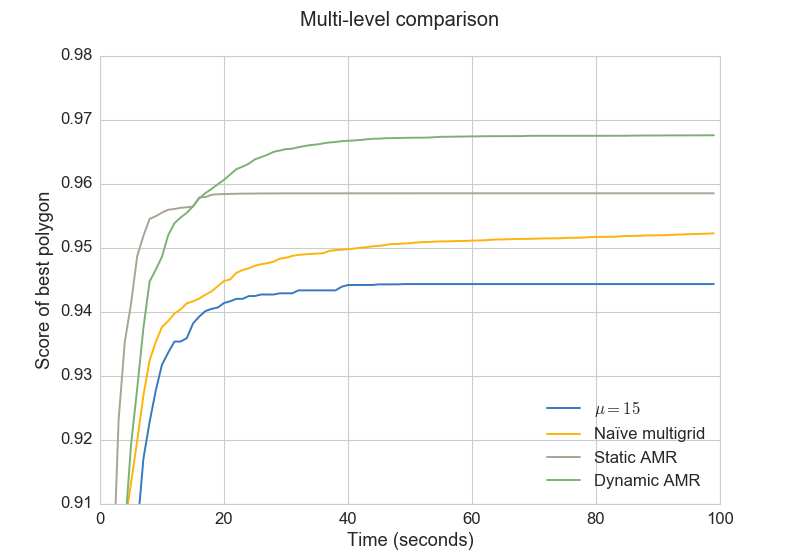

In [20]:
nested_static = np.array(pickle.load(open(osp.join(SAVE_DIR, '02.24, multilevel med nest grid/results.pickle'), 'rb')))
dynamic_amr_and_naive = np.array(pickle.load(open(osp.join(SAVE_DIR, '02.24, multilevel med nest grid/run2/results.pickle'), 'rb')))
mu_15 = np.array(pickle.load(open(osp.join(SAVE_DIR, '02.19, multileveling server/results.pickle'), 'rb')))[3:4,:100]

data = np.zeros((4,100))
data[0] = mu_15
data[1] = dynamic_amr_and_naive[1]
data[2] = nested_static[1]
data[3] = dynamic_amr_and_naive[0]

#data = np.concatenate((dynamic_amr_and_naive, nested_static[1:2], mu_15))
x = range(data.shape[1])

sns.set(rc={"figure.figsize": (10, 7)}, font_scale=1.5)
sns.set_style("whitegrid")
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
#sns.palplot(sns.xkcd_palette(colors))
#sns.set(rc={"figure.figsize": (7, 5)})
sns.set_palette(sns.xkcd_palette(colors))

labels = [
         r'$\mu = 15$',
          'Naïve multigrid',
          'Static AMR',
          'Dynamic AMR',
         ]
fig, ax = plt.subplots()

fig.suptitle("Multi-level comparison")
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Score of best polygon')

ax.set_ylim([0.91,0.98])

for i in range(data.shape[0]):
    plt.plot(x, data[i], label=labels[i])
    
lgd = plt.legend(labels, loc='lower right')
fig.savefig('diff_multi-level.eps', transparent=False)

In [12]:
mu_15.shape

(1, 100)

# Pickle to Pandas

In [ ]:
data = pickle.load(open(osp.join(SAVE_DIR, '02.15, gpu server/results.pickle'), 'rb'))

# Benchmarking of cost function

<IPython.core.display.Javascript object>


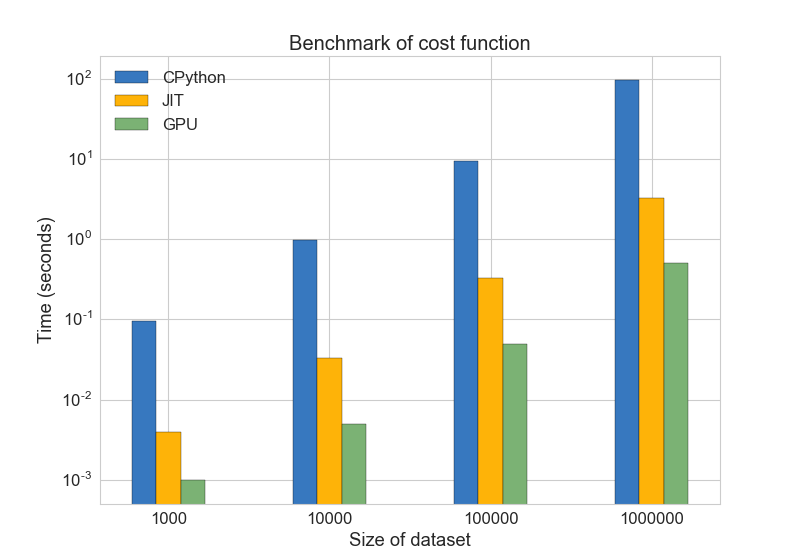

([<matplotlib.axis.XTick at 0x19a40564630>,
 <a list of 4 Text xticklabel objects>)

In [9]:
data = pickle.load(open(osp.join(SAVE_DIR, '02.15, gpu server/results.pickle'), 'rb'))

xvalues = [1000, 10000, 100000, 1000000]

sns.set(rc={"figure.figsize": (10, 7)}, font_scale=1.5)
sns.set_style("whitegrid")
COLORS = ['#3778BF', '#FEB308', '#7BB274', '#A8A495']
sns.set_palette(sns.xkcd_palette(colors))

fig, ax = plt.subplots()
index = np.arange(len(xvalues))
bar_width = 0.15
rects = []
plt.style.use('seaborn-whitegrid')
for i in range(data.shape[0]):
    rects.append(ax.bar(index + bar_width * i, data[i], bar_width, color=COLORS[i],
                        log=True
                        )[0])

labels = [
          'CPython',
          'JIT',
          'GPU'
         ]

legend = plt.legend(rects, labels, loc='upper left')
ax.set_axisbelow(True)
plt.ylabel('Time (seconds)')
plt.xlabel('Size of dataset')
plt.axis([-0.2, len(xvalues) - 0.35, np.amin(data) / 2, np.amax(data) * 2])
plt.title('Benchmark of cost function')
plt.xticks(index + bar_width * (data.shape[0] / 2), xvalues)

# directory = SAVE_DIR
# file_name = "benchmark of cost function"
# fig.savefig(os.path.join(directory, file_name + '.' + 'png'), transparent=False)

In [ ]:
print(plt.style.available)

# GPU vs. CPU

In [10]:
gpu_dropped = [68, 140, 335, 598, 673, 837, 868, 932, 1070, 1063]
cpu_dropped = [73, 169, 357, 543, 676, 839, 881, 925, 1086, 1018]

gpu_result = [5.6815, 12.481, 21.8565, 39.1235, 64.2495, 97.735, 141.813, 199.2635, 274.3895, 365.491]
cpu_result = [73.748, 104.288, 98.547, 115.88, 146.9585, 193.0865, 242.532, 308.405, 389.471, 486.3695]

granularity = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


<IPython.core.display.Javascript object>


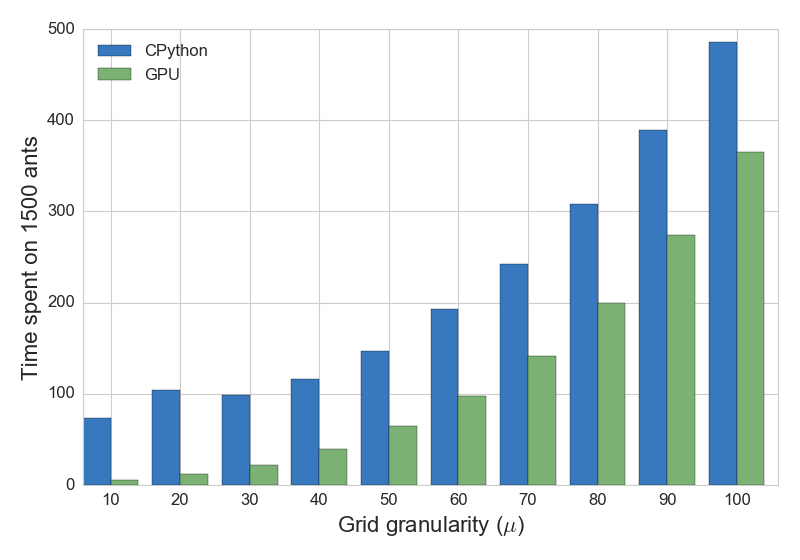

In [46]:
fig, ax = plt.subplots()

index = np.arange(len(granularity))
bar_width = 0.4
rects = []
plt.style.use('seaborn-whitegrid')

plt.bar(index, cpu_result, bar_width, color=COLORS[0], label='CPython')
plt.bar(index + bar_width, gpu_result, bar_width, color=COLORS[2], label='GPU')

ax.set_axisbelow(True)
plt.xlabel(r'Grid granularity ($\mu$)', size=20)
plt.ylabel('Time spent on 1500 ants', size=20)
plt.xticks(index + bar_width, granularity)
plt.legend(loc='upper left')
plt.tight_layout()

#fig.savefig('gpu_vs_cpu.eps', bbox_extra_artists=(legend,), bbox_inches='tight')

<IPython.core.display.Javascript object>


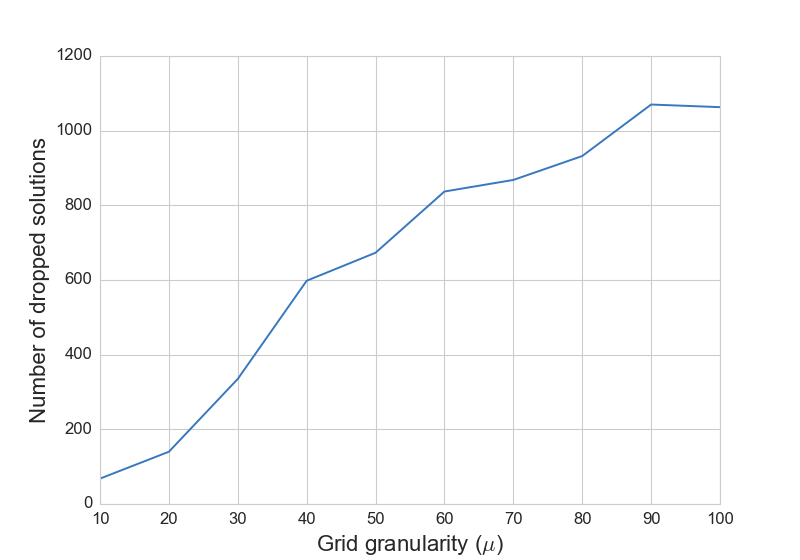

In [19]:
fig, ax = plt.subplots()

index = np.arange(len(granularity))
bar_width = 0.4
plt.style.use('seaborn-whitegrid')

plt.plot(granularity, gpu_dropped, color='#3778BF')

ax.set_axisbelow(True)
plt.xlabel(r'Grid granularity ($\mu$)', size=20)
plt.ylabel('Number of dropped solutions',size=20)

# directory = SAVE_DIR
# file_name = "dropp_rate"
# fig.savefig(os.path.join(directory, file_name + '.' + 'png'), transparent=False)